In [3]:
import pandas as pd

# Step 1: Load and convert
df = pd.read_csv(r"C:\Users\ppran\Downloads\notebook\processed\delhi_pr.csv", parse_dates=['date'])
df['stock_var'] = df['stock_var'].replace(',', '', regex=True).astype(float)


print(df.dtypes)
print(df.head())


date                         datetime64[ns]
month                                 int64
primary_price_avg                   float64
secondary_price_avg                 float64
stock_var                           float64
retail_sales                        float64
non_retail_sales                    float64
price_diff                          float64
retail_sales_lag_1                  float64
retail_sales_lag_2                  float64
retail_sales_lag_3                  float64
non_retail_sales_lag_1              float64
non_retail_sales_lag_2              float64
non_retail_sales_lag_3              float64
primary_price_avg_lag_1             float64
primary_price_avg_lag_2             float64
primary_price_avg_lag_3             float64
secondary_price_avg_lag_1           float64
secondary_price_avg_lag_2           float64
secondary_price_avg_lag_3           float64
price_diff_lag_1                    float64
price_diff_lag_2                    float64
price_diff_lag_3                

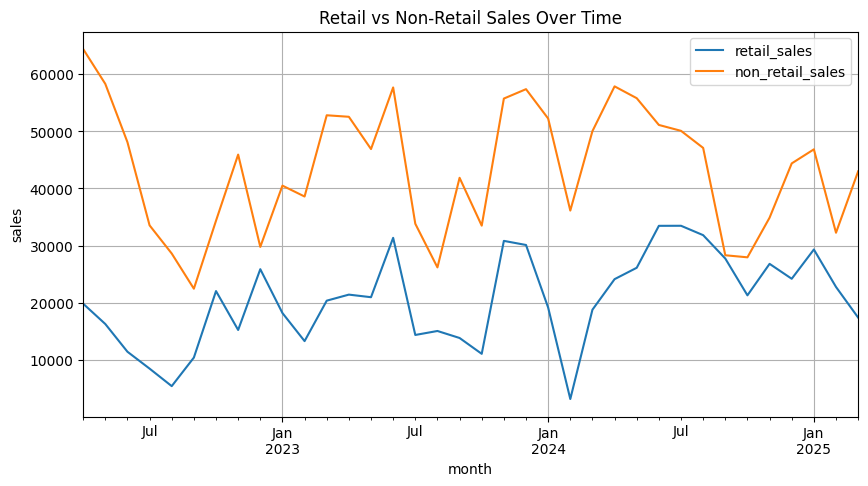

In [19]:
import matplotlib.pyplot as plt

df.plot(x='month', y=['retail_sales', 'non_retail_sales'], figsize=(10, 5))
plt.title('Retail vs Non-Retail Sales Over Time')
plt.xlabel('month')
plt.ylabel('sales')
plt.grid(True)
plt.show()


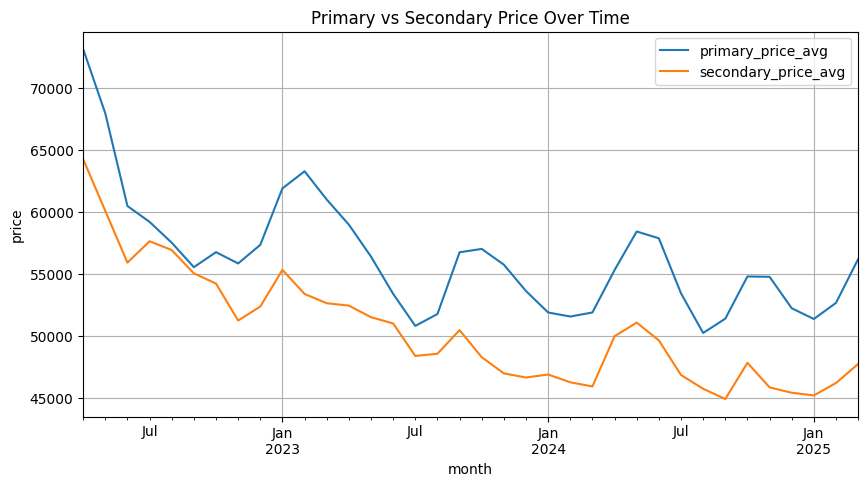

In [21]:
import matplotlib.pyplot as plt

df.plot(x='month', y=['primary_price_avg', 'secondary_price_avg'], figsize=(10, 5))
plt.title('Primary vs Secondary Price Over Time')
plt.xlabel('month')
plt.ylabel('price')
plt.grid(True)
plt.show()


In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load your cleaned dataset
df = pd.read_csv(r"C:\Users\ppran\Downloads\delhi.csv", parse_dates=['month'])

# Step 1: Create price difference feature
df['price_diff'] = df['primary_price_avg'] - df['secondary_price_avg']

# Step 2: Select features and targets
features = ['primary_price_avg', 'secondary_price_avg', 'price_diff']
targets = ['retail_sales', 'non_retail_sales']

# Step 3: Evaluate each feature's effect using R² score
results = {}

for target in targets:
    results[target] = {}
    for feature in features:
        X = df[[feature]]
        y = df[target]

        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)

        results[target][feature] = r2

# Step 4: Display the R² scores
import pprint
print("📊 R² Scores (Higher = Stronger Influence):")
pprint.pprint(results)


📊 R² Scores (Higher = Stronger Influence):
{'non_retail_sales': {'price_diff': 0.16436903213281862,
                      'primary_price_avg': 0.11279420668091689,
                      'secondary_price_avg': 0.019138689461563274},
 'retail_sales': {'price_diff': 0.11177640763357011,
                  'primary_price_avg': 0.050913000481229265,
                  'secondary_price_avg': 0.1692686023963479}}


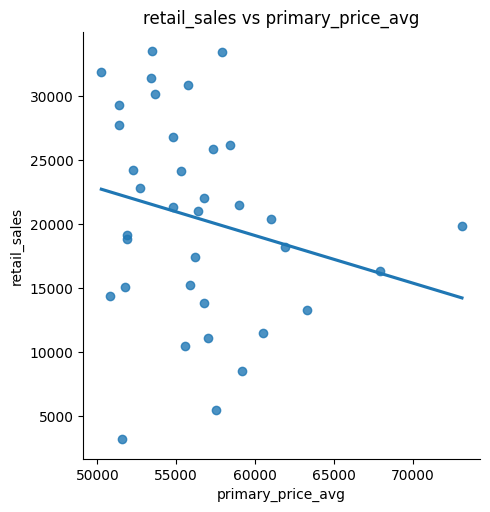

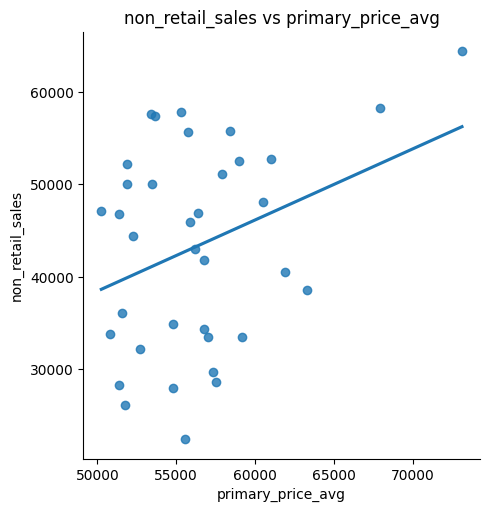

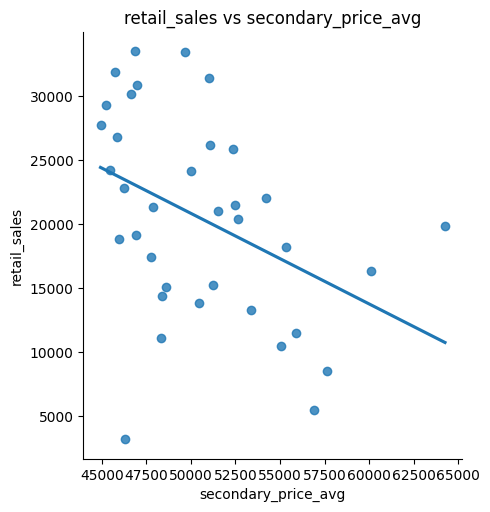

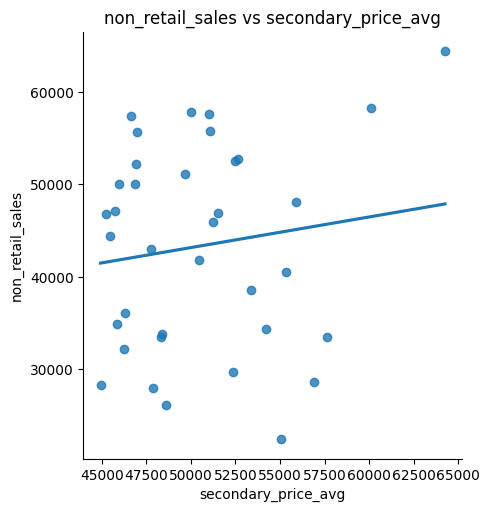

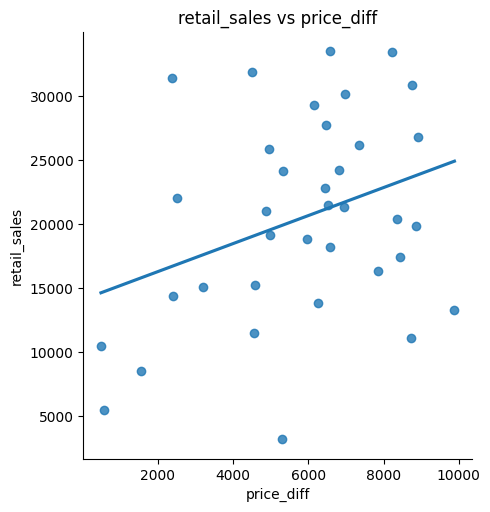

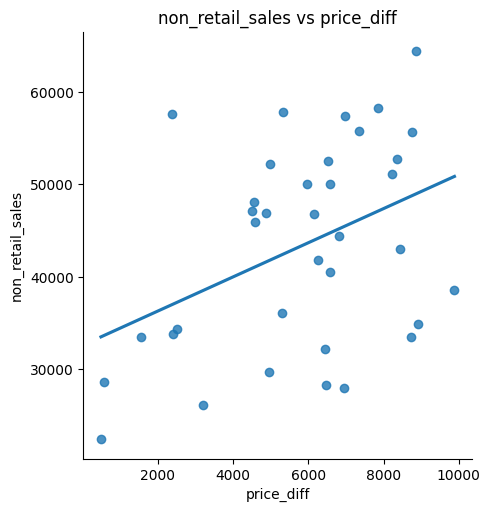

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features:
    for target in targets:
        sns.lmplot(x=feature, y=target, data=df, ci=None)
        plt.title(f'{target} vs {feature}')
        plt.show()


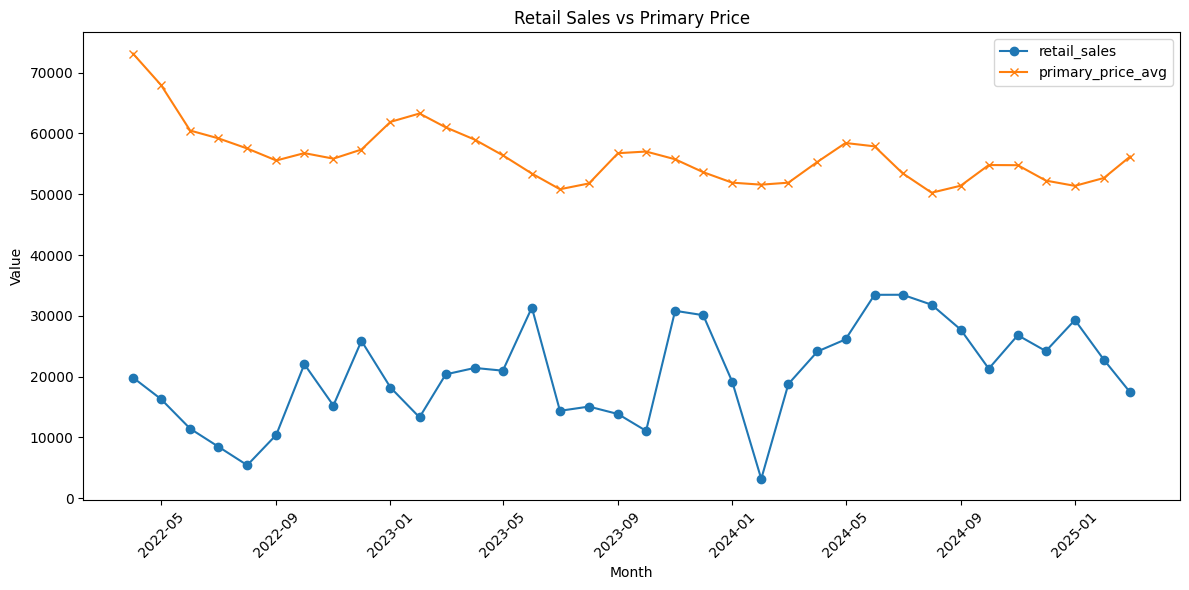

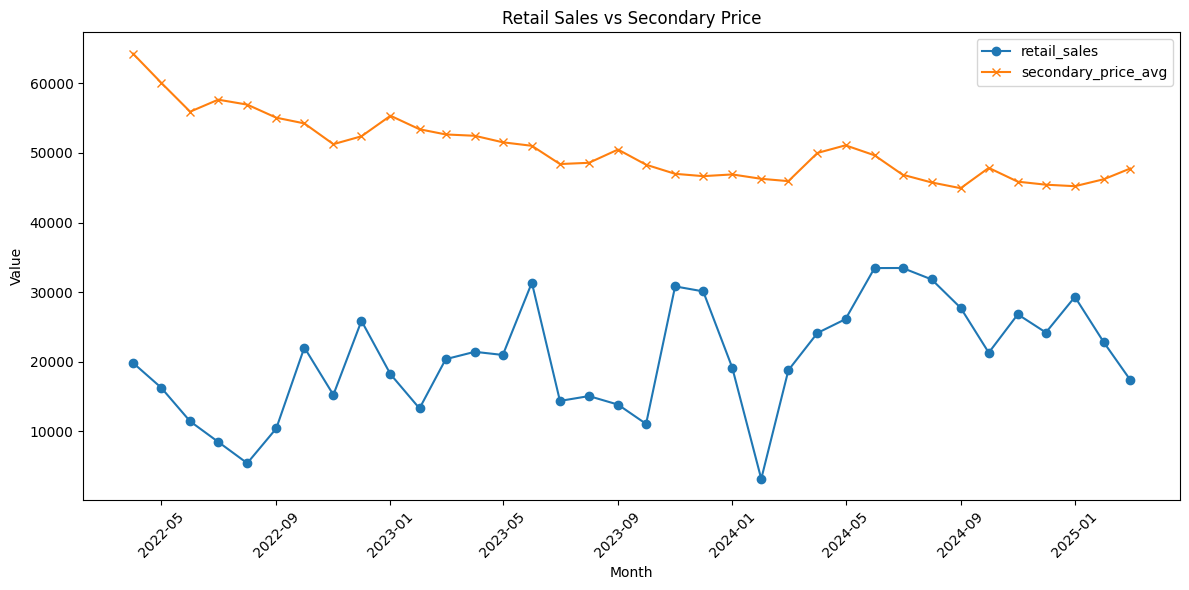

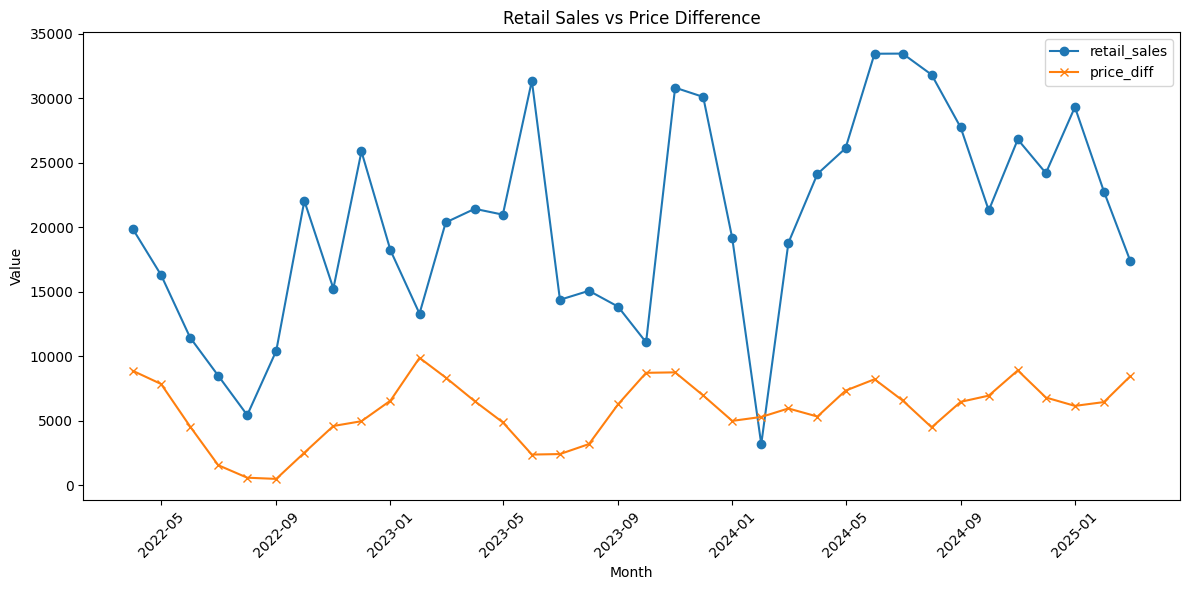

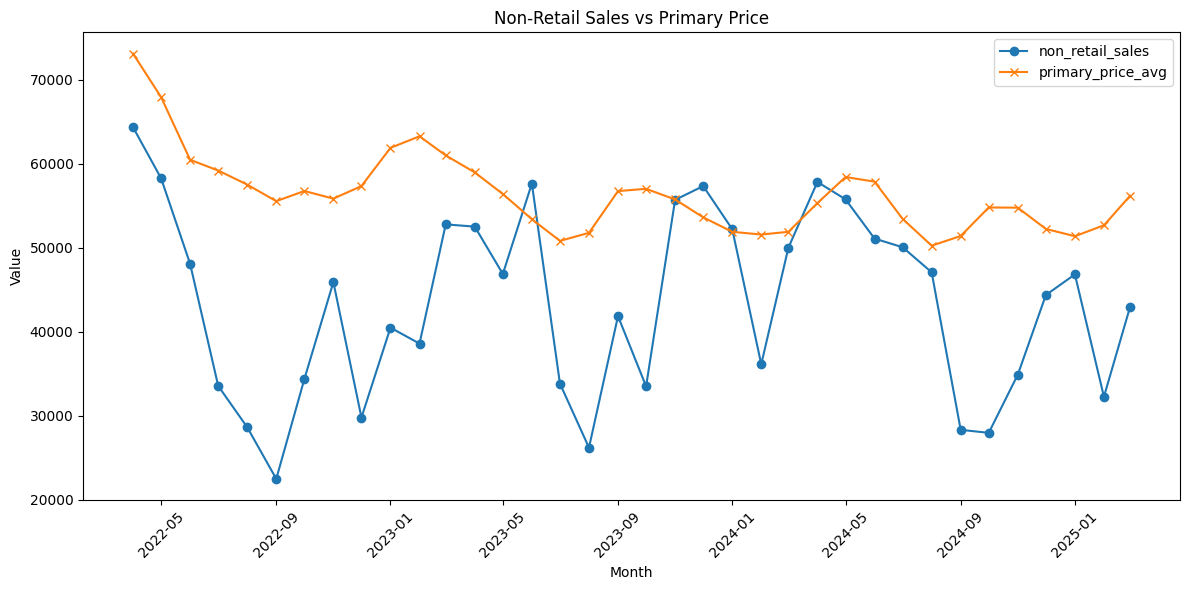

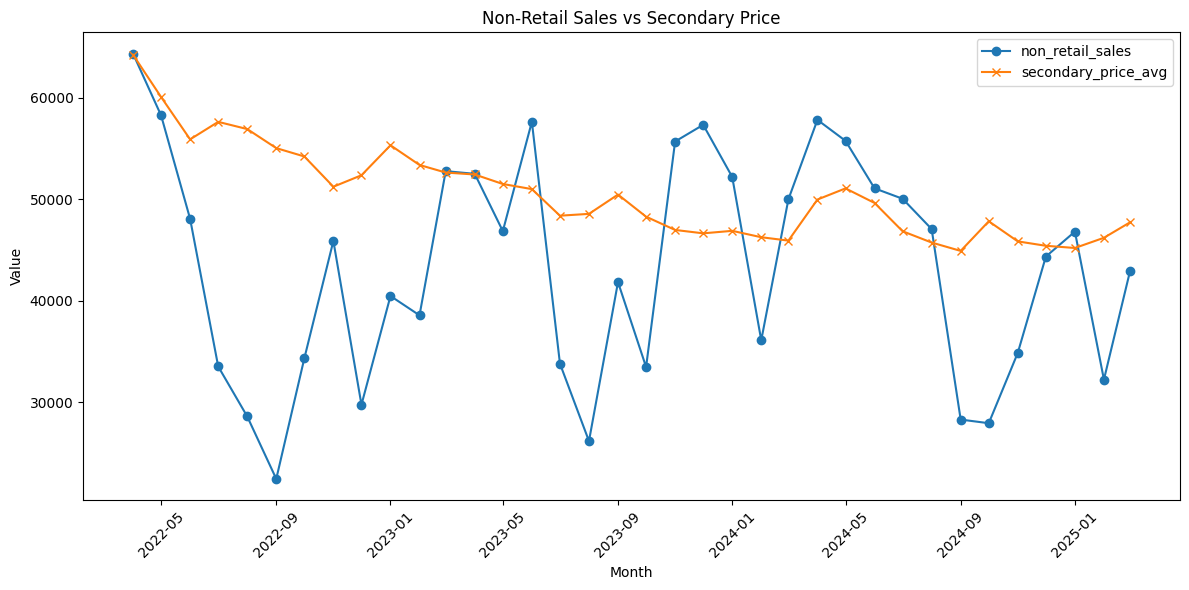

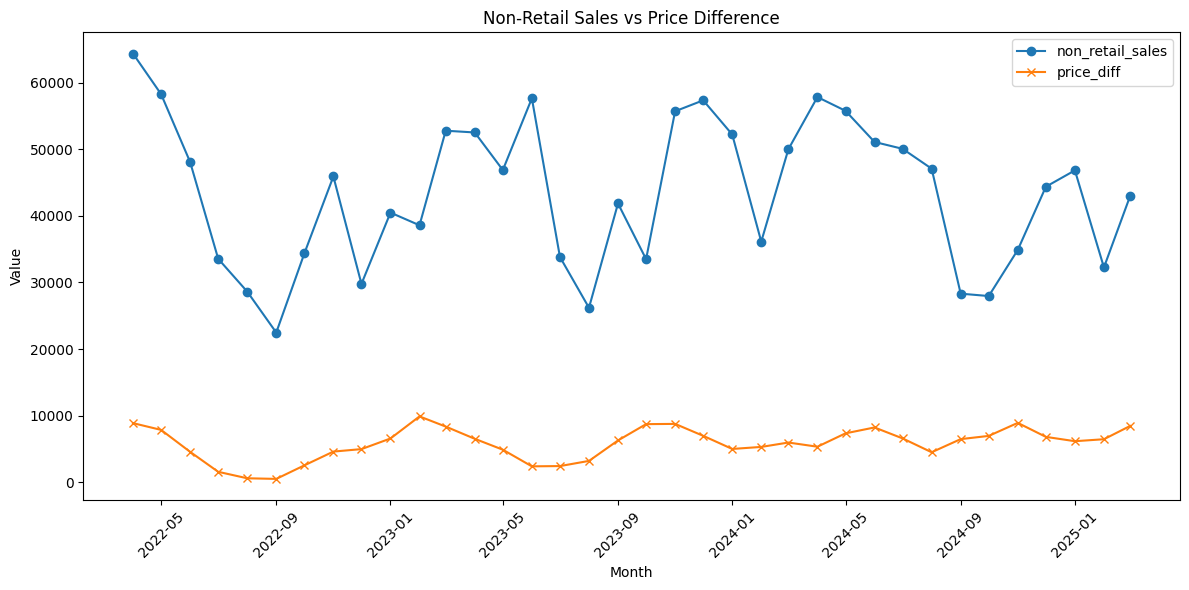

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

df = pd.read_csv(r"C:\Users\ppran\Downloads\delhi.csv", parse_dates=['month'])  # Make sure 'month' column parsed as datetime
df['price_diff'] = df['primary_price_avg'] - df['secondary_price_avg']

# Helper function to plot sales vs price metrics
def plot_sales_vs_price(df, sales_col, price_col, title):
    plt.figure(figsize=(12,6))
    plt.plot(df['month'], df[sales_col], label=sales_col, marker='o')
    plt.plot(df['month'], df[price_col], label=price_col, marker='x')
    plt.xlabel('Month')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Retail Sales vs Primary Price
plot_sales_vs_price(df, 'retail_sales', 'primary_price_avg', 'Retail Sales vs Primary Price')

# Retail Sales vs Secondary Price
plot_sales_vs_price(df, 'retail_sales', 'secondary_price_avg', 'Retail Sales vs Secondary Price')

# Retail Sales vs Price Difference
plot_sales_vs_price(df, 'retail_sales', 'price_diff', 'Retail Sales vs Price Difference')

# Non-Retail Sales vs Primary Price
plot_sales_vs_price(df, 'non_retail_sales', 'primary_price_avg', 'Non-Retail Sales vs Primary Price')

# Non-Retail Sales vs Secondary Price
plot_sales_vs_price(df, 'non_retail_sales', 'secondary_price_avg', 'Non-Retail Sales vs Secondary Price')

# Non-Retail Sales vs Price Difference
plot_sales_vs_price(df, 'non_retail_sales', 'price_diff', 'Non-Retail Sales vs Price Difference')

In [12]:
import pandas as pd
import os

# === 1. Load your pre-sorted CSV ===
# 📍 CHANGE THIS PATH if your raw file is in a different folder or filename
df = pd.read_csv(r"C:\Users\ppran\Downloads\durgapur.csv", parse_dates=['month'])

# === 2. Parse the 'date' column ===
# Format is assumed to be like 'Apr-22' or '2022-04-01'
df['month'] = pd.to_datetime(df['month'], format='%Y-%m-%d')  # your format is '2022-04-01'

# === 3. Create price difference feature ===
df['price_diff'] = df['primary_price_avg'] - df['secondary_price_avg']

# === 4. Create lag features (1–3 months) for each variable ===
lag_features = ['retail_sales', 'non_retail_sales', 'primary_price_avg', 'secondary_price_avg', 'price_diff']

for feature in lag_features:
    for lag in range(1, 4):  # lag 1 to 3
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

# === 5. Rolling 3-month average for price features ===
df['primary_price_roll3'] = df['primary_price_avg'].rolling(window=3).mean()
df['secondary_price_roll3'] = df['secondary_price_avg'].rolling(window=3).mean()

# === 6. Add calendar and time trend features ===
df['month'] = df['month'].dt.month             # 1 to 12
df['trend_index'] = range(len(df))            # 0, 1, 2, ...

# === 7. Drop rows without enough lag/rolling data (first 3 rows) ===
df = df.iloc[3:].reset_index(drop=True)

# === 8. Save to processed folder ===
# 📍 CHANGE THIS if you want to save elsewhere or rename file
processed_path = r"C:\Users\ppran\Downloads\notebook\processed\delhi_pr.csv"
os.makedirs(os.path.dirname(processed_path), exist_ok=True)
df.to_csv(processed_path, index=False)

print(f"✅ Processed CSV saved at: {processed_path}")


✅ Processed CSV saved at: C:\Users\ppran\Downloads\notebook\processed\delhi_pr.csv


In [14]:
import pandas as pd

# Load your processed CSV
df = pd.read_csv(r"C:\Users\ppran\Downloads\notebook\processed\delhi_pr.csv")  # or delhi_pr.csv, etc.

# Replace the 'month' column with proper datetime values (Apr 2022 to Mar 2025 = 36 months)
# We'll generate a clean date range starting from 2022-04-01
df['date'] = pd.date_range(start='2022-07-01', periods=len(df), freq='MS')

# Optional: move 'date' column to the front if you want
cols = df.columns.tolist()
cols = ['date'] + [col for col in cols if col != 'date']
df = df[cols]

# Save if needed
df.to_csv(r"C:\Users\ppran\Downloads\notebook\processed\delhi_pr.csv", index=False)

print(df.head())


        date  month  primary_price_avg  secondary_price_avg  retail_sales  \
0 2022-07-01      7            59400.0            53988.462      7060.550   
1 2022-08-01      8            56880.0            52352.083      7409.476   
2 2022-09-01      9            55050.0            50765.385     10803.741   
3 2022-10-01     10            55720.0            50795.000     15985.283   
4 2022-11-01     11            55750.0            47457.692     10627.292   

   non_retail_sales  price_diff  retail_sales_lag_1  retail_sales_lag_2  \
0          33543.95    5411.538           15421.760           15562.770   
1          28619.99    4527.917            7060.550           15421.760   
2          22470.83    4284.615            7409.476            7060.550   
3          34352.95    4925.000           10803.741            7409.476   
4          45910.81    8292.308           15985.283           10803.741   

   retail_sales_lag_3  ...  primary_price_avg_lag_3  \
0           16480.650  ...     

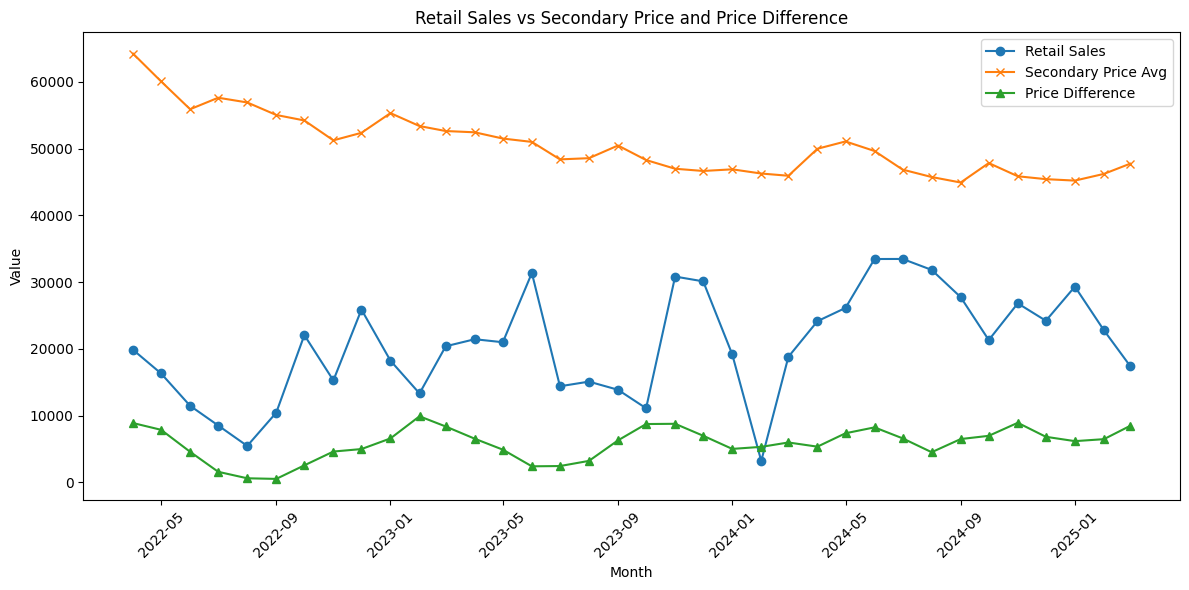

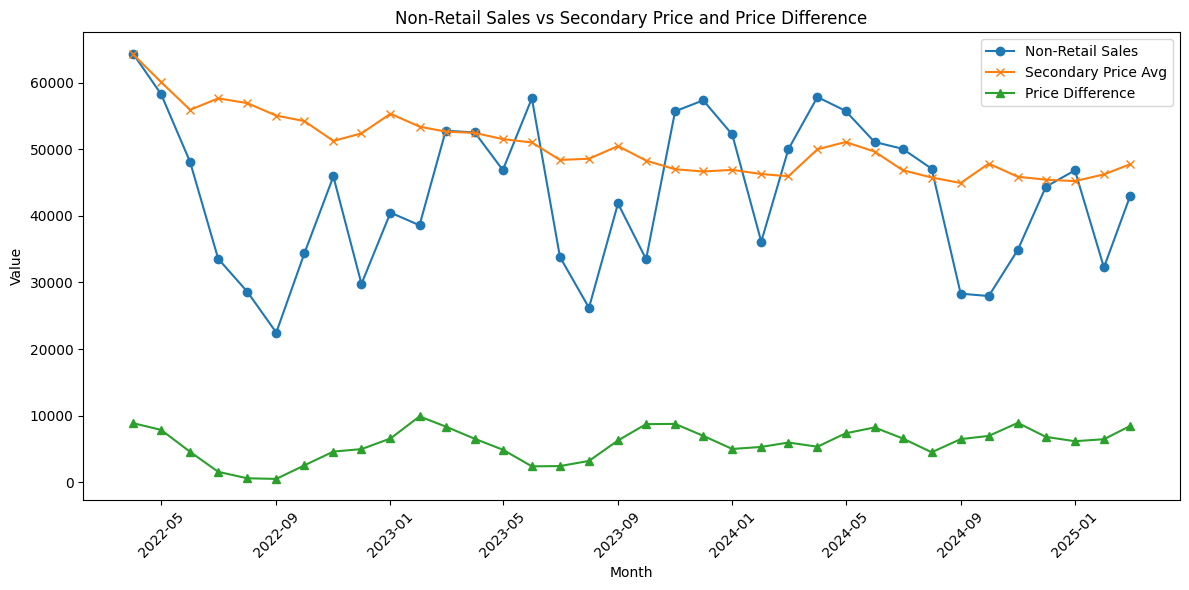

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv(r"C:\Users\ppran\Downloads\delhi.csv", parse_dates=['month'])
df['price_diff'] = df['primary_price_avg'] - df['secondary_price_avg']

# Plot: Retail Sales, Secondary Price, and Price Difference
plt.figure(figsize=(12,6))
plt.plot(df['month'], df['retail_sales'], label='Retail Sales', marker='o')
plt.plot(df['month'], df['secondary_price_avg'], label='Secondary Price Avg', marker='x')
plt.plot(df['month'], df['price_diff'], label='Price Difference', marker='^')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Retail Sales vs Secondary Price and Price Difference')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot: Non-Retail Sales, Secondary Price, and Price Difference
plt.figure(figsize=(12,6))
plt.plot(df['month'], df['non_retail_sales'], label='Non-Retail Sales', marker='o')
plt.plot(df['month'], df['secondary_price_avg'], label='Secondary Price Avg', marker='x')
plt.plot(df['month'], df['price_diff'], label='Price Difference', marker='^')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Non-Retail Sales vs Secondary Price and Price Difference')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

# 1. Read CSV with date parsing
df = pd.read_csv(r"C:\Users\ppran\Downloads\notebook\processed\delhi_pr.csv", parse_dates=['date'], dayfirst=True)  # dayfirst=True for dd-mm-yyyy

# 2. Sort by date
df = df.sort_values('date')

# 3. Add rolling averages for retail and non-retail sales
df['retail_sales_roll3'] = df['retail_sales'].rolling(window=3, min_periods=1).mean()
df['non_retail_sales_roll3'] = df['non_retail_sales'].rolling(window=3, min_periods=1).mean()

# 4. Save updated DataFrame to CSV (overwrite or new file)
df.to_csv(r"C:\Users\ppran\Downloads\notebook\processed\delhi_pr.csv", index=False)


In [4]:
import pandas as pd

# Load CSV
df = pd.read_csv(r"C:\Users\ppran\Downloads\notebook\processed\delhi_pr.csv", parse_dates=['date'], dayfirst=True)

# Add stock_var lag features
lag_periods = [1, 2, 3]
for lag in lag_periods:
    df[f'stock_var_lag_{lag}'] = df['stock_var'].shift(lag)

# Drop rows with NaNs from lagging (optional but recommended for modeling)
df = df.dropna().reset_index(drop=True)

# Save to same file or create a new one
df.to_csv(r"C:\Users\ppran\Downloads\notebook\processed\delhi_pr.csv", index=False)

print("Lag features added and saved successfully.")


Lag features added and saved successfully.


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 1. Read CSV with date parsing
df = pd.read_csv(r"C:\Users\ppran\Downloads\notebook\processed\delhi_pr.csv", parse_dates=['date'], dayfirst=True)

# 2. Drop columns you don't want as features
df = df.drop(columns=['month', 'trend_index', 'date'])

# 3. Define targets and initialize dictionary to store results
targets = ['retail_sales', 'non_retail_sales']
feature_importances_results = {}

for target in targets:
    # Prepare features and target
    X = df.drop(columns=[target])
    y = df[target]
    
    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    # Extract and sort feature importances
    feature_importances = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    feature_importances_results[target] = feature_importances
    
    print(f"\nTop features for target: {target}\n", feature_importances.head(5))

# If you want, you can access feature_importances_results['retail_sales'] or ['non_retail_sales'] for further use.



Top features for target: retail_sales
                     feature  importance
22       retail_sales_roll3    0.477055
5        retail_sales_lag_1    0.104266
3          non_retail_sales    0.070927
13  primary_price_avg_lag_3    0.046104
19         price_diff_lag_3    0.041932

Top features for target: non_retail_sales
                         feature  importance
27  non_retail_sales_custom_avg    0.409555
23       non_retail_sales_roll3    0.242804
3                  retail_sales    0.057019
24              stock_var_lag_1    0.035741
20          primary_price_roll3    0.030151


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv(r"C:\Users\ppran\Downloads\notebook\processed\delhi_pr.csv", parse_dates=['date'], dayfirst=True)
df = df.drop(columns=['month', 'trend_index', 'date'])

# Feature sets for each target
features_retail = ['retail_sales_roll3', 'retail_sales_lag_1', 'primary_price_avg_lag_3', 'non_retail_sales', 'price_diff_lag_1']
features_non_retail = ['non_retail_sales_custom_avg', 'non_retail_sales_roll3', 'retail_sales', 'stock_var_lag_1', 'primary_price_roll3','stock_var']

# Targets
target_retail = 'retail_sales'
target_non_retail = 'non_retail_sales'

# Prepare data
X_retail = df[features_retail]
y_retail = df[target_retail]

X_non_retail = df[features_non_retail]
y_non_retail = df[target_non_retail]

# Train-test split function for reuse
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Models dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR()
}

# Evaluation function
def evaluate_models(X, y):
    X_train, X_test, y_train, y_test = split_data(X, y)
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        results[name] = {
            'MAE': mean_absolute_error(y_test, preds),
            'RMSE': np.sqrt(mean_squared_error(y_test, preds)),

            'R2': r2_score(y_test, preds)
        }
    return results

# Evaluate retail models
print("Evaluating models for retail sales:")
results_retail = evaluate_models(X_retail, y_retail)
for model_name, metrics in results_retail.items():
    print(f"{model_name}: MAE={metrics['MAE']:.3f}, RMSE={metrics['RMSE']:.3f}, R2={metrics['R2']:.3f}")

print("\nEvaluating models for non-retail sales:")
# Evaluate non-retail models
results_non_retail = evaluate_models(X_non_retail, y_non_retail)
for model_name, metrics in results_non_retail.items():
    print(f"{model_name}: MAE={metrics['MAE']:.3f}, RMSE={metrics['RMSE']:.3f}, R2={metrics['R2']:.3f}")


Evaluating models for retail sales:
Linear Regression: MAE=5074.819, RMSE=6199.019, R2=0.651
Random Forest: MAE=5975.421, RMSE=7516.458, R2=0.487
Gradient Boosting: MAE=5447.801, RMSE=7034.180, R2=0.551
SVR: MAE=9888.480, RMSE=10843.610, R2=-0.068

Evaluating models for non-retail sales:
Linear Regression: MAE=6794.660, RMSE=7147.734, R2=0.524
Random Forest: MAE=5742.443, RMSE=7250.220, R2=0.510
Gradient Boosting: MAE=4625.645, RMSE=6232.638, R2=0.638
SVR: MAE=9534.109, RMSE=10416.871, R2=-0.012
